In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
896,2020-07-06,United Kingdom,285891.0,285416.0,44379.0,44220.0,475.0,159.0
897,2020-07-06,Germany,196829.0,196554.0,9028.0,9016.0,275.0,12.0
898,2020-07-06,Iran,241087.0,240438.0,11550.0,11571.0,649.0,-21.0
899,2020-07-06,Turkey,205712.0,205758.0,5224.0,5225.0,-46.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2693.6326304106547
RMSE =  6448.574719965561


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  311.92785793562706
RMSE =  717.2854975647062


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13384.045454545454
RMSE =  16885.073988316104
-- World performances for deaths --
MAE =  1590.340909090909
RMSE =  1934.6002758380675


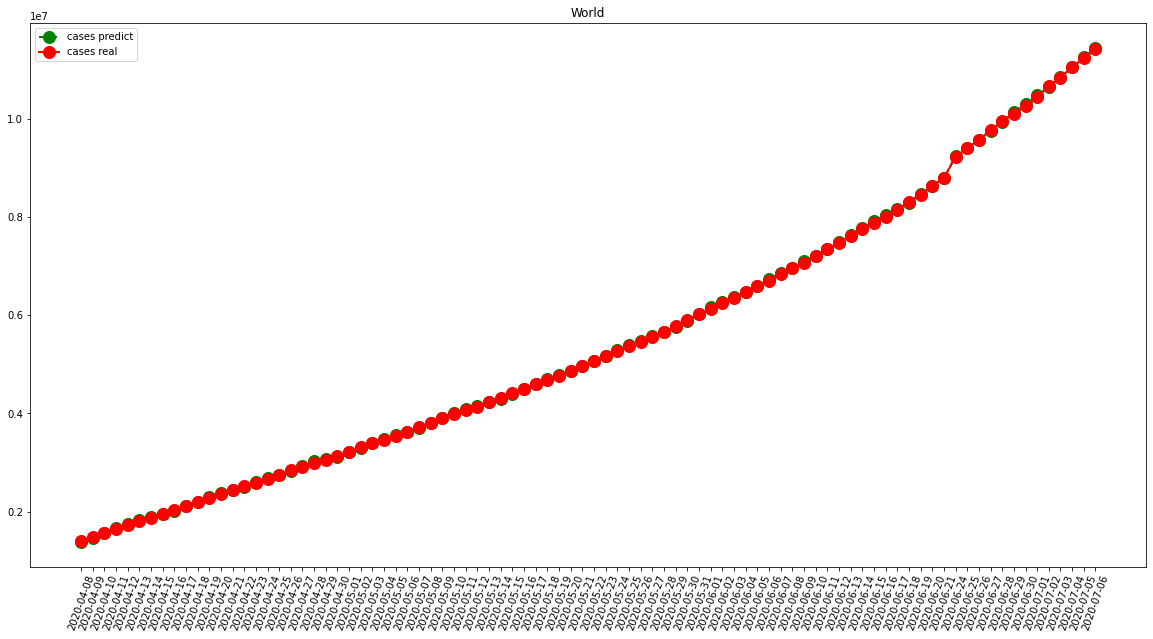

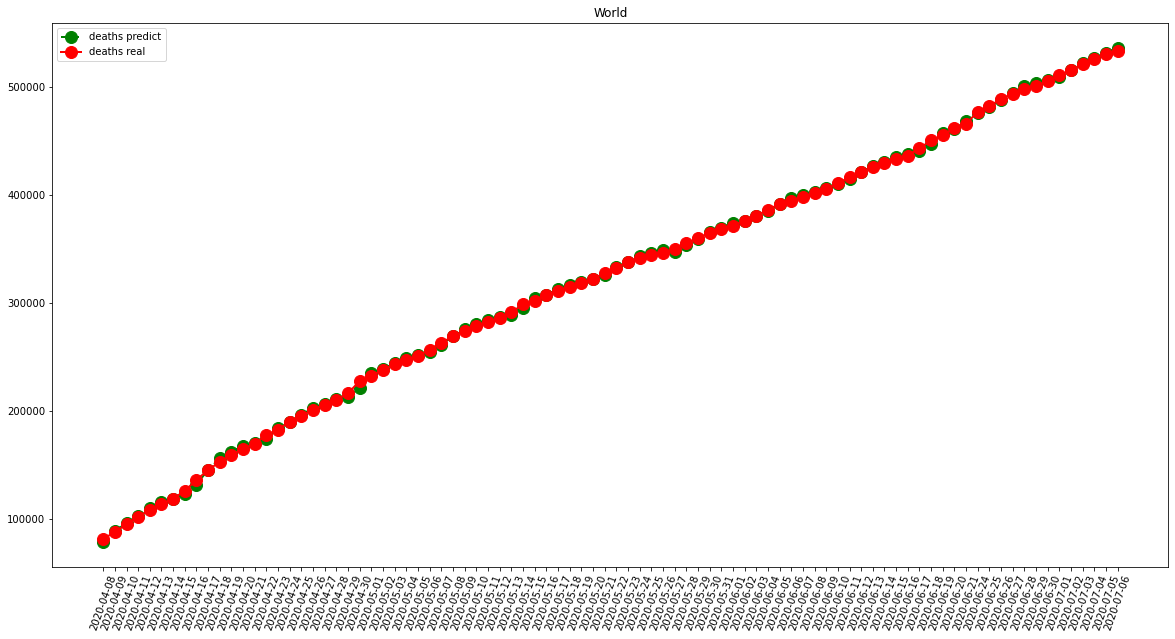

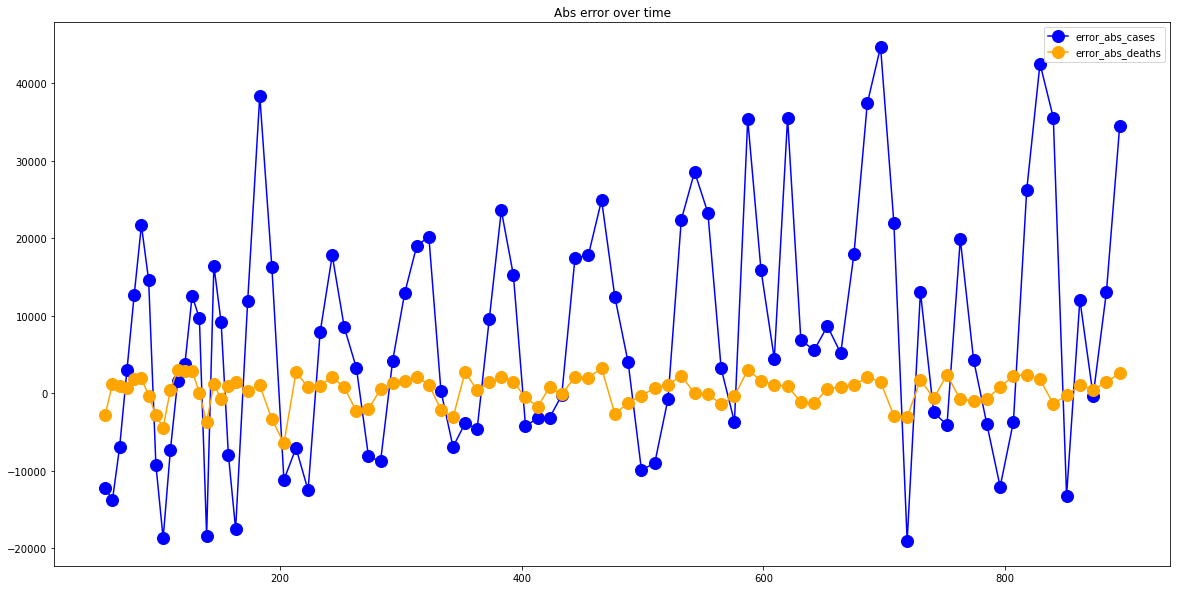

In [7]:
visShow("World")

-- France performances for cases --
MAE =  881.1428571428571
RMSE =  1458.5595494129382
-- France performances for deaths --
MAE =  179.8673469387755
RMSE =  338.34430296214356


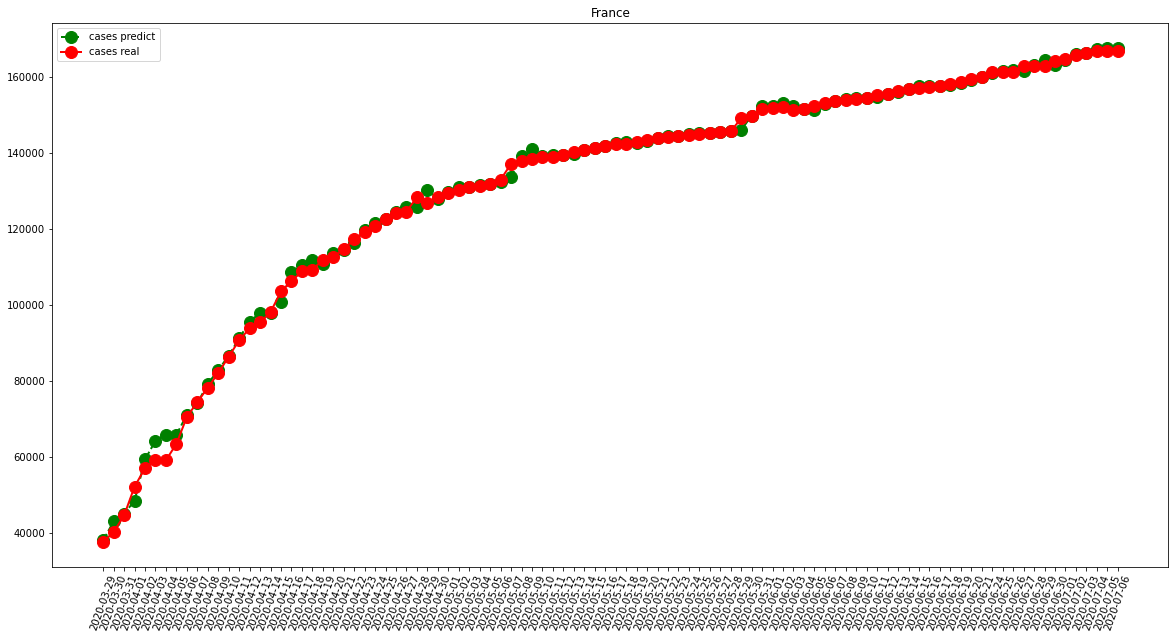

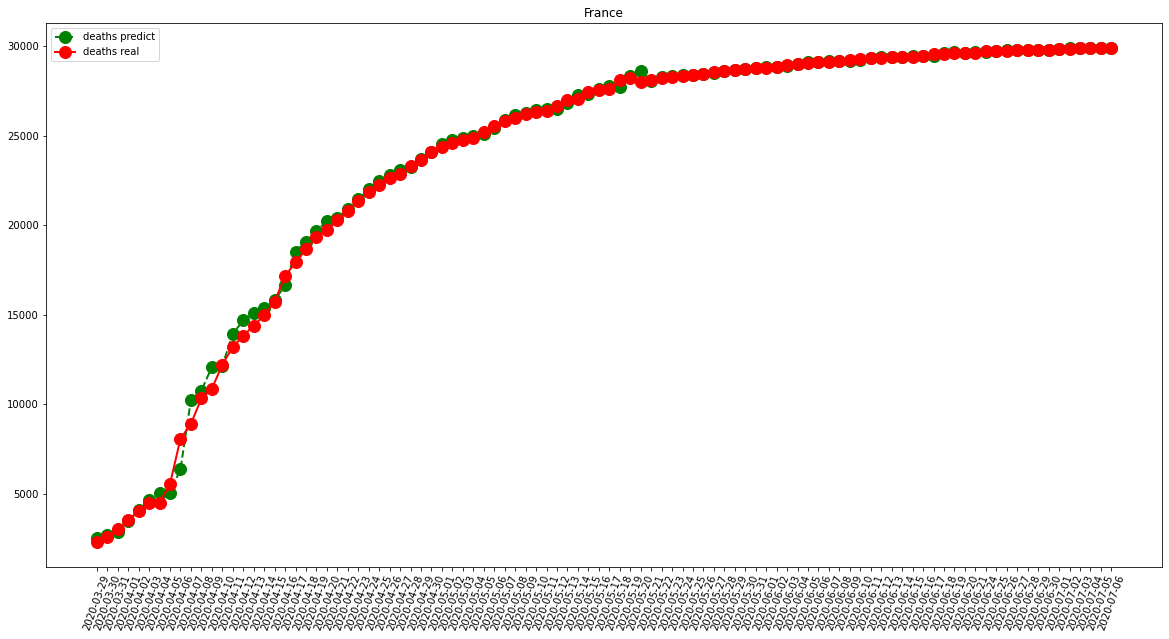

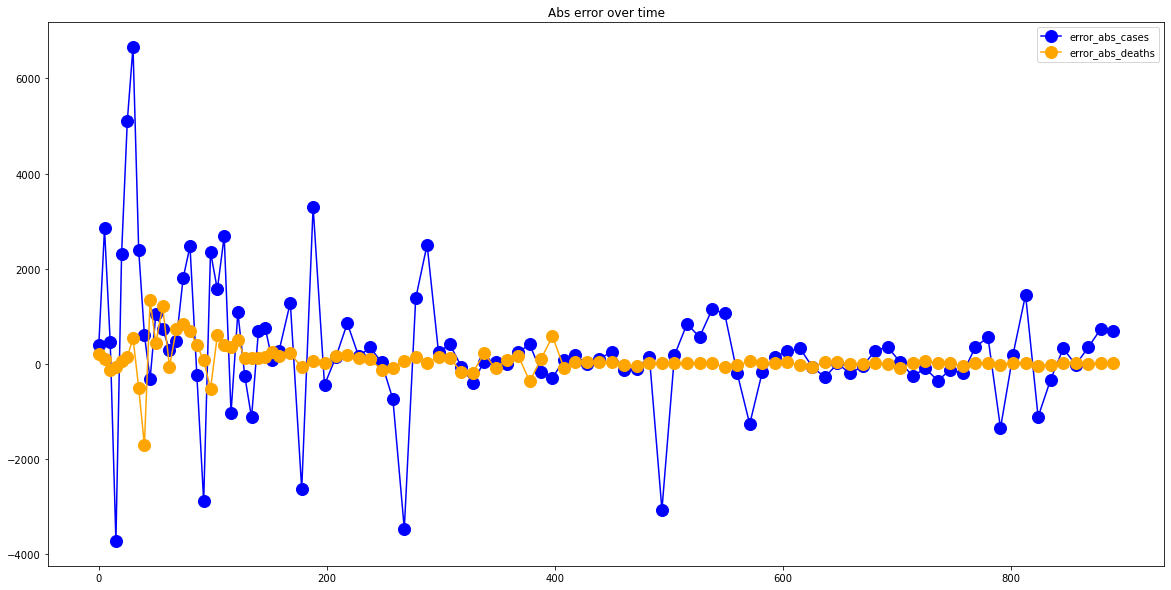

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  376.44897959183675
RMSE =  547.4738088973494
-- Italy performances for deaths --
MAE =  99.03061224489795
RMSE =  298.7083247338549


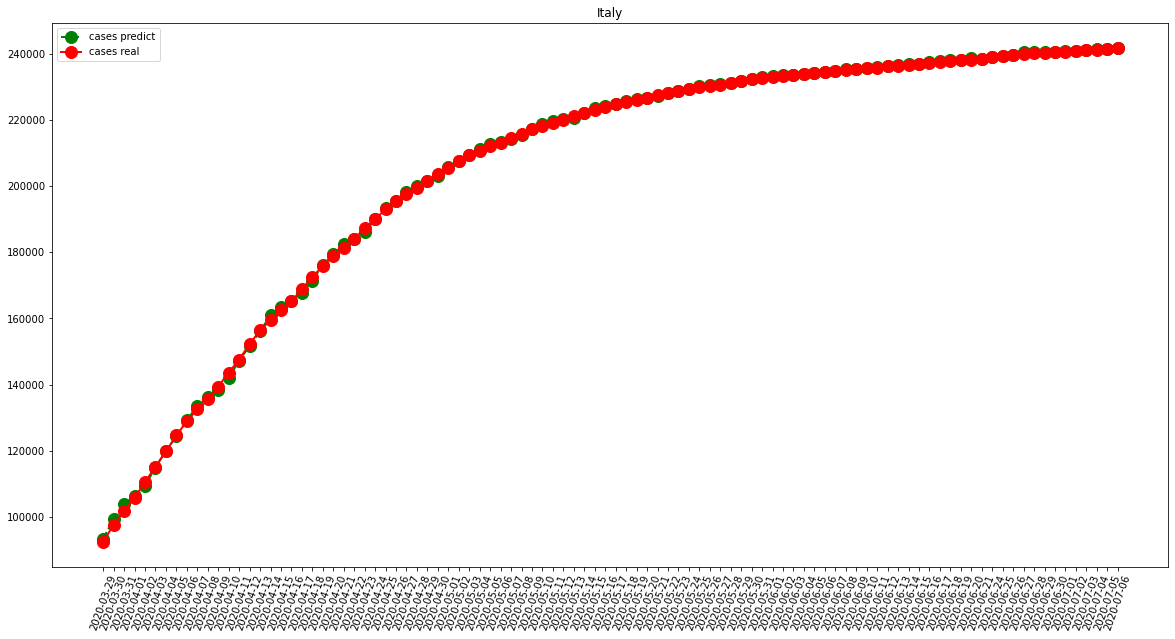

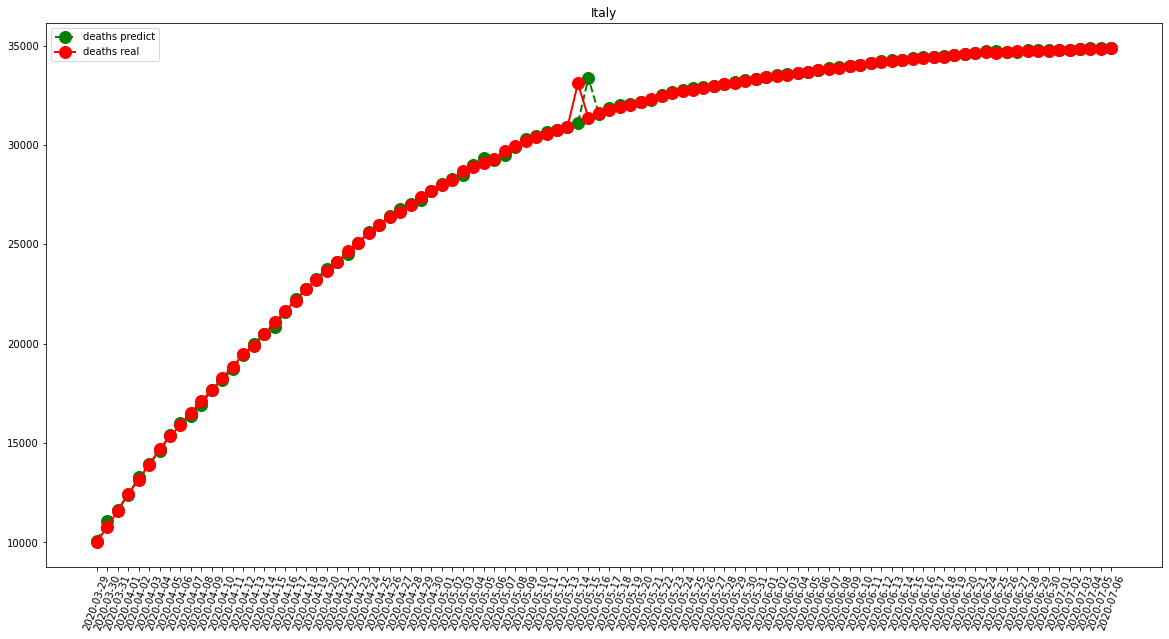

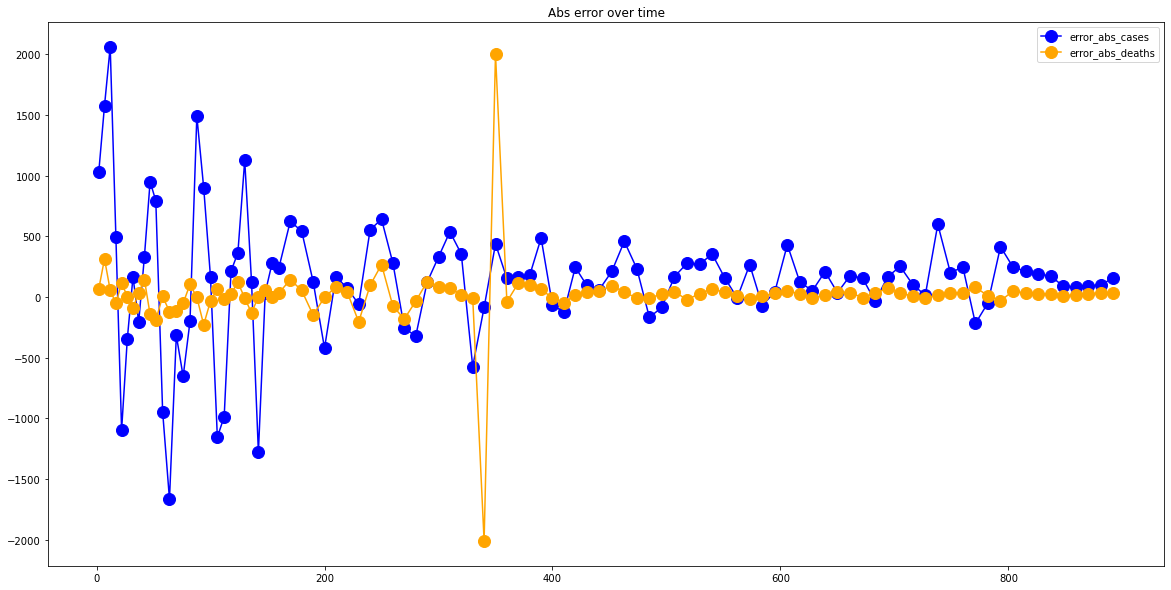

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  855.9897959183673
RMSE =  2065.7851227727892
-- Spain performances for deaths --
MAE =  184.8877551020408
RMSE =  410.00100796292224


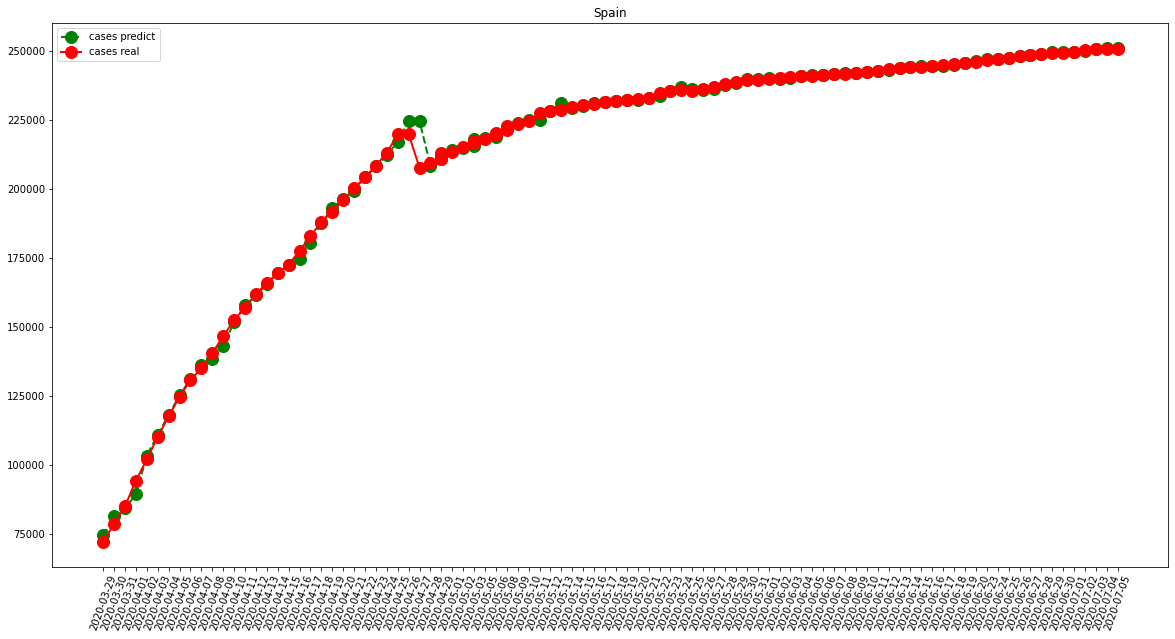

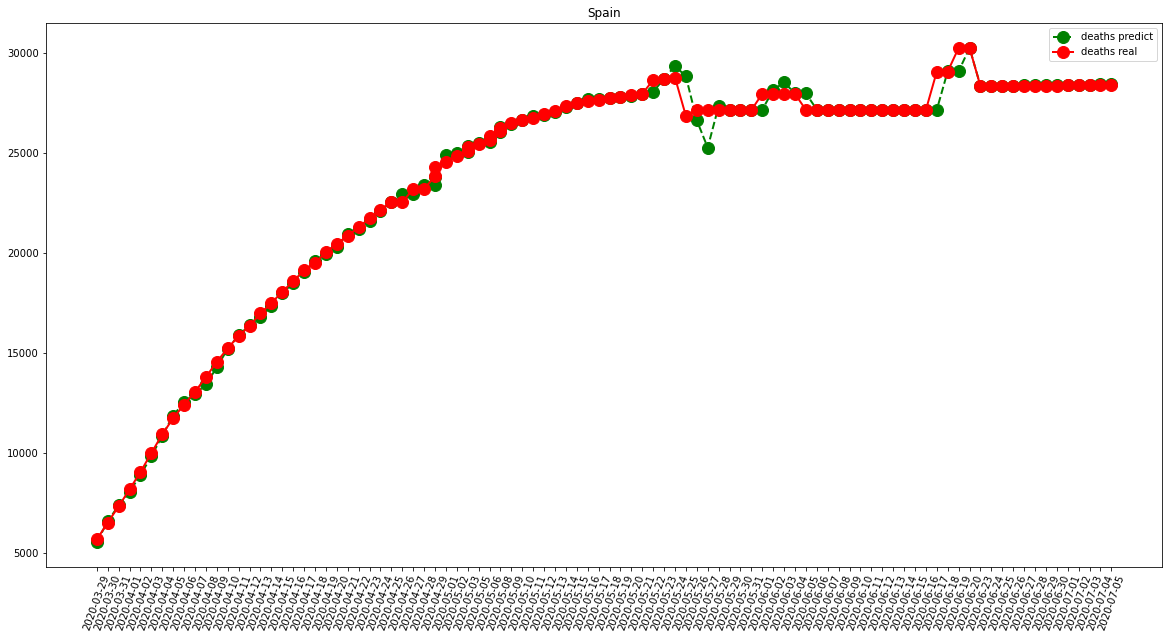

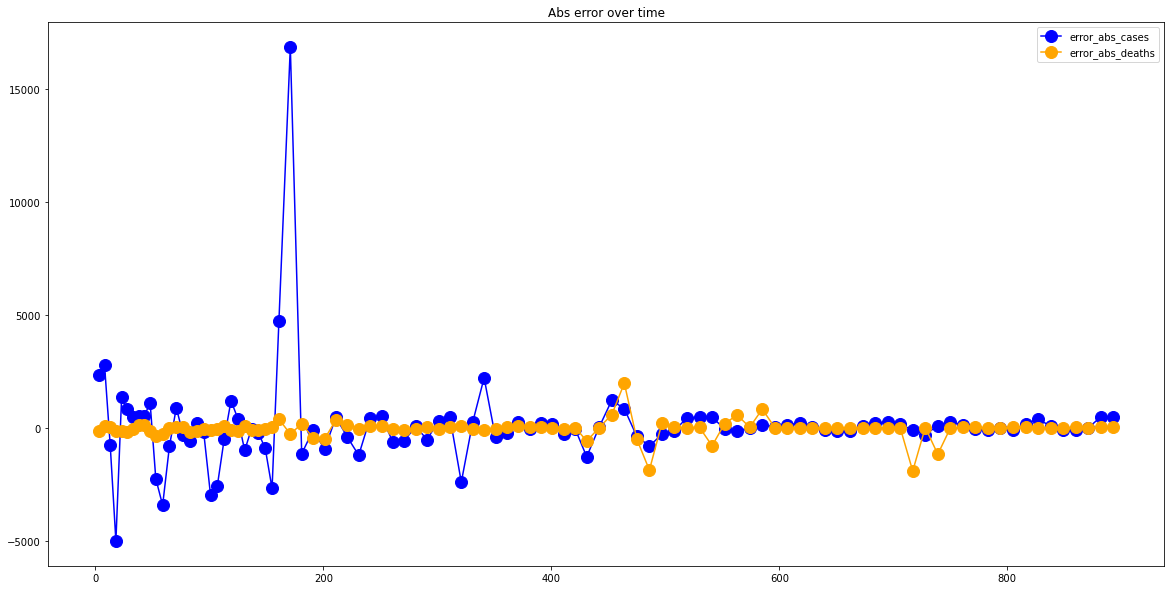

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  4806.857142857143
RMSE =  6611.438642108641
-- United States performances for deaths --
MAE =  540.969387755102
RMSE =  787.2526433679318


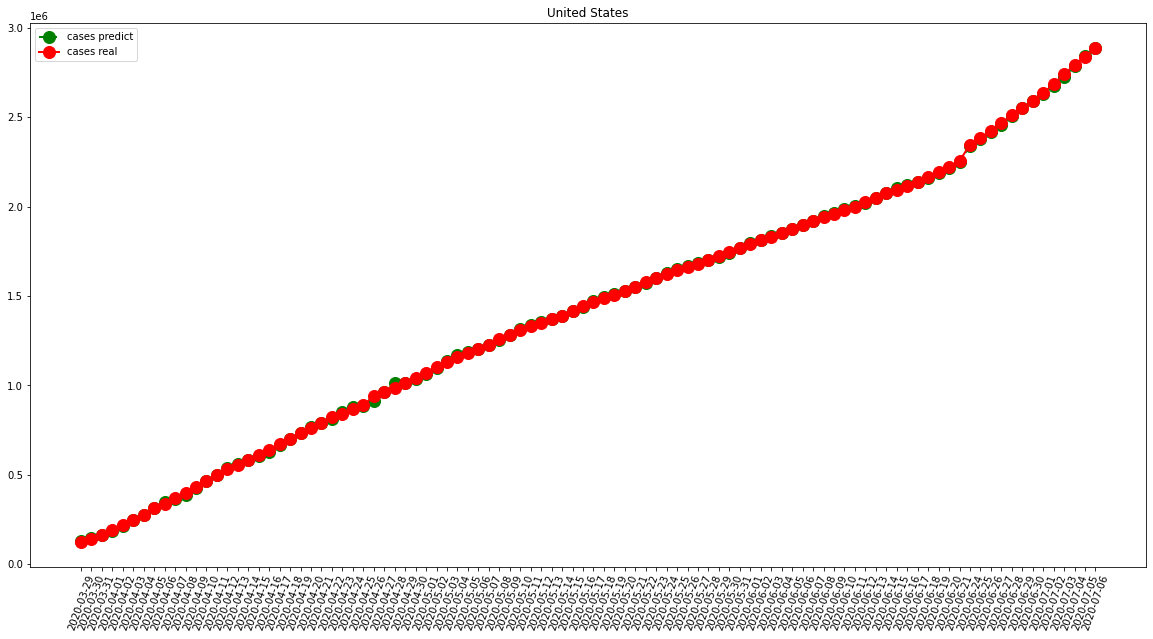

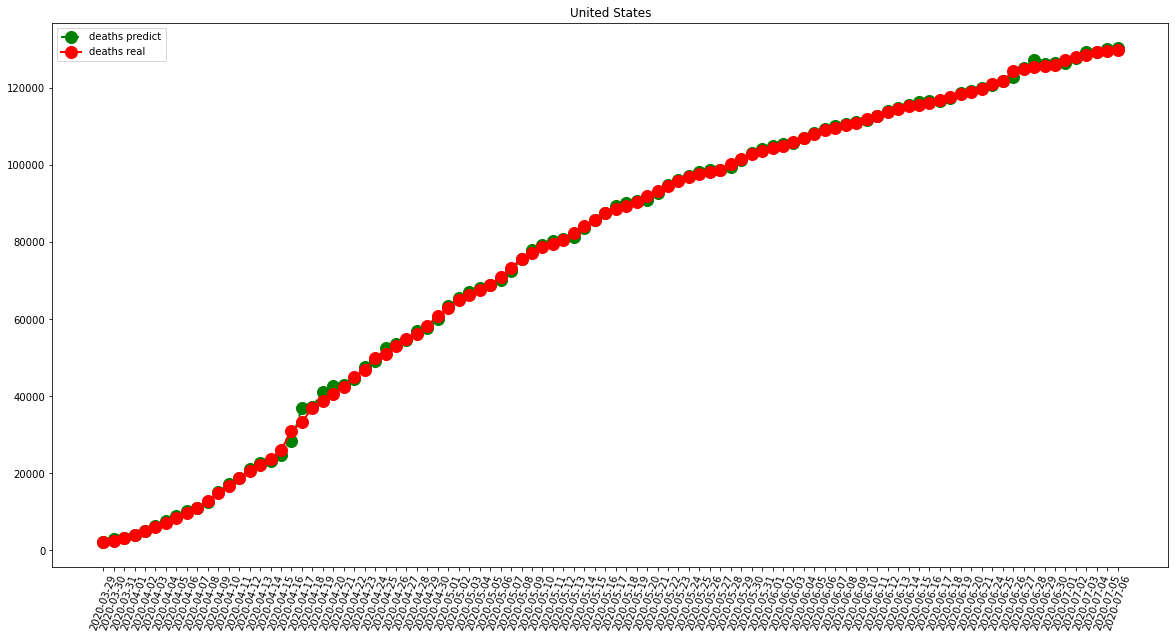

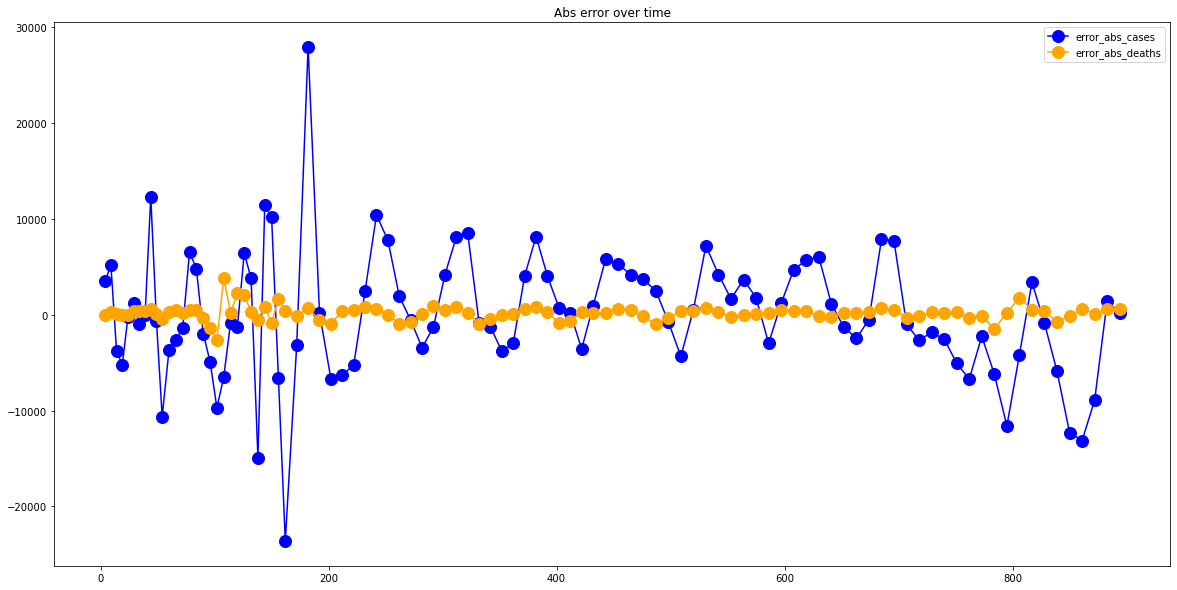

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  90.39795918367346
RMSE =  118.98332073128947
-- China performances for deaths --
MAE =  39.02040816326531
RMSE =  158.53886409512157


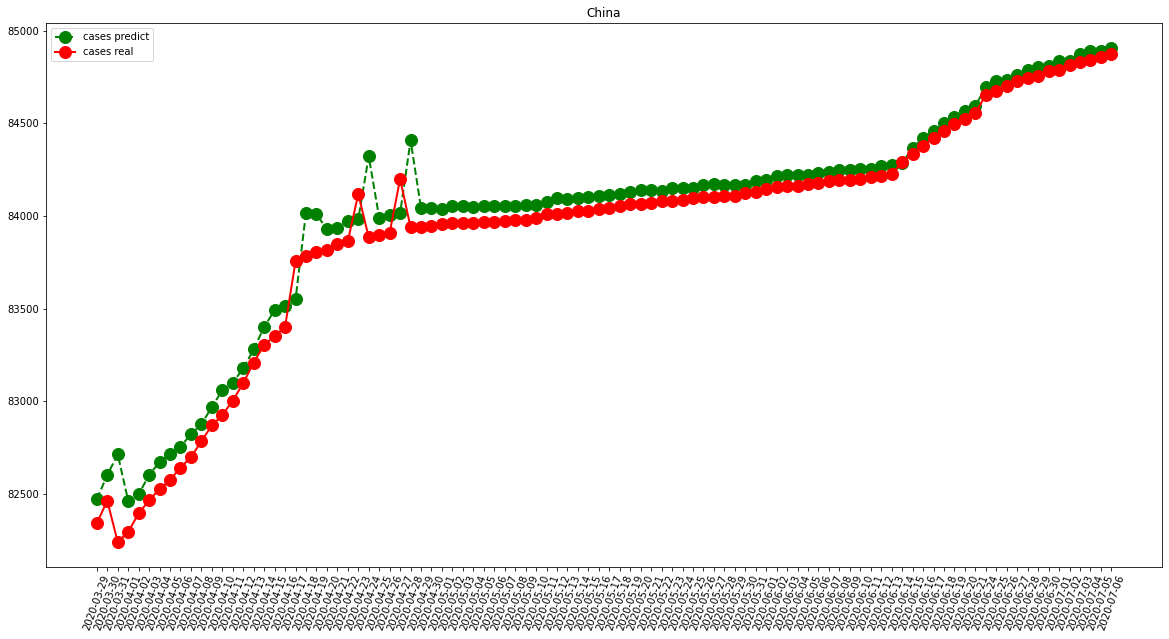

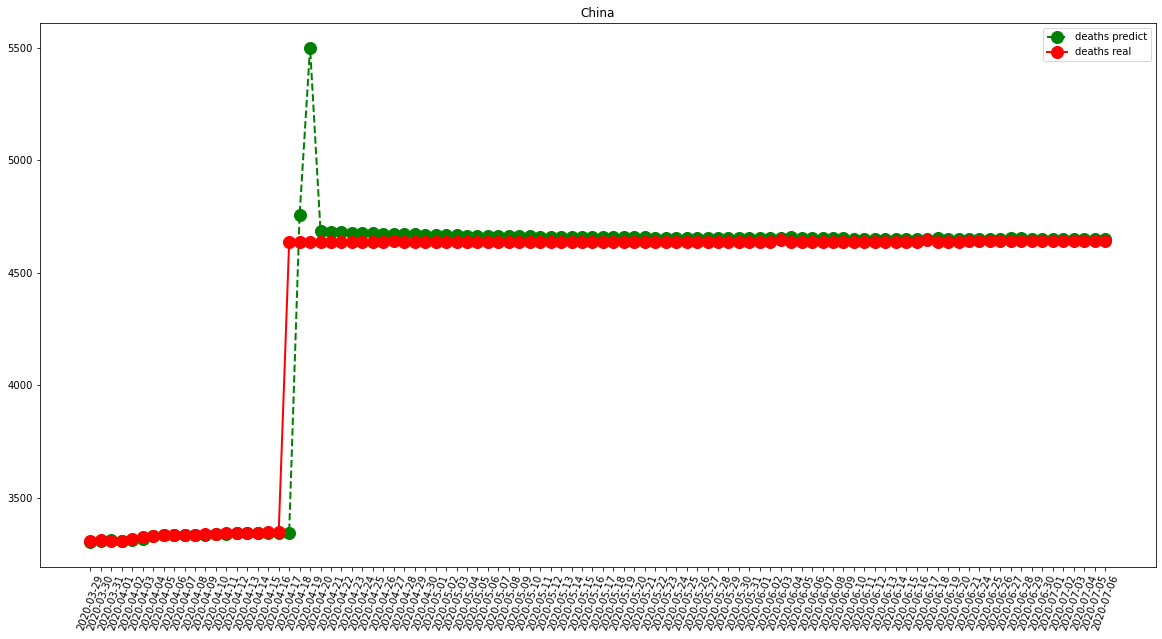

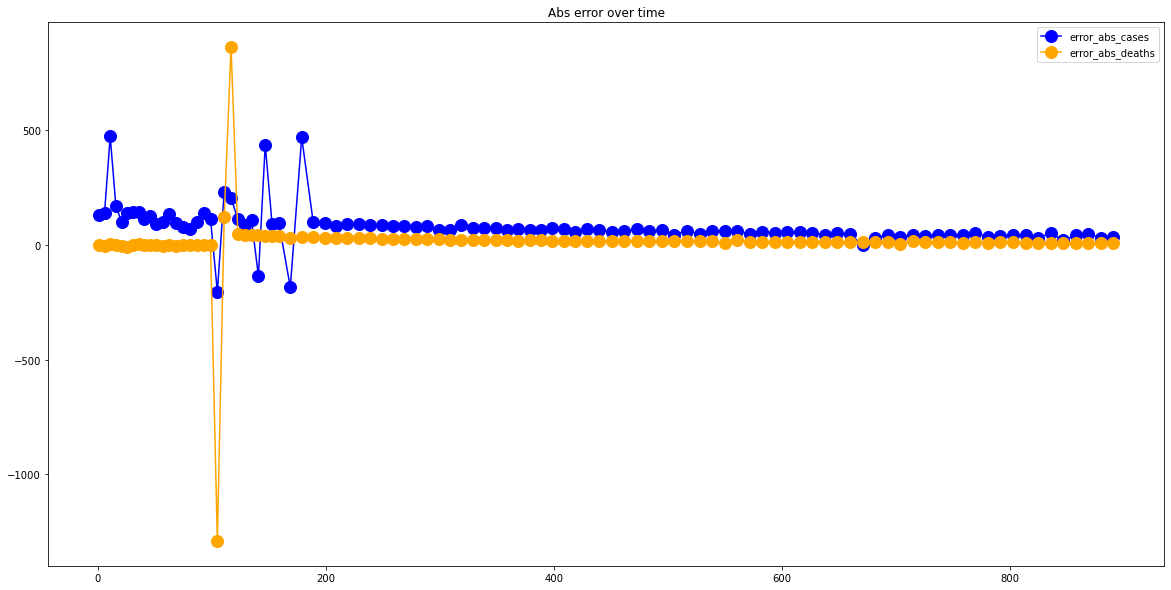

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1626.9857142857143
RMSE =  4983.220403084163
-- United Kingdom performances for deaths --
MAE =  248.17142857142858
RMSE =  584.3728261991654


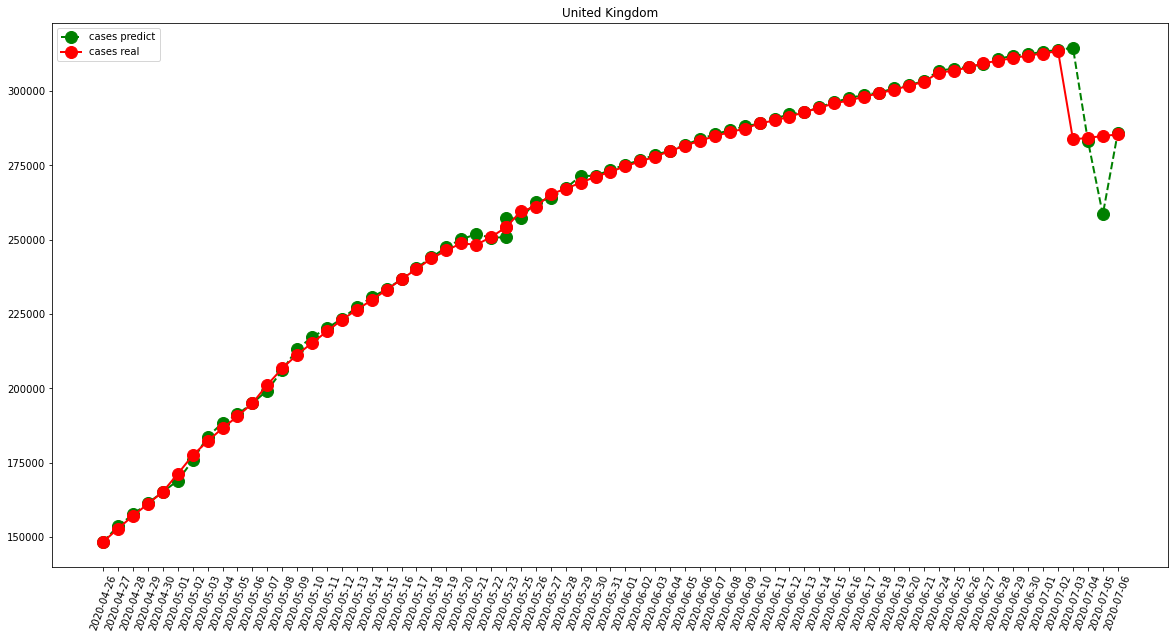

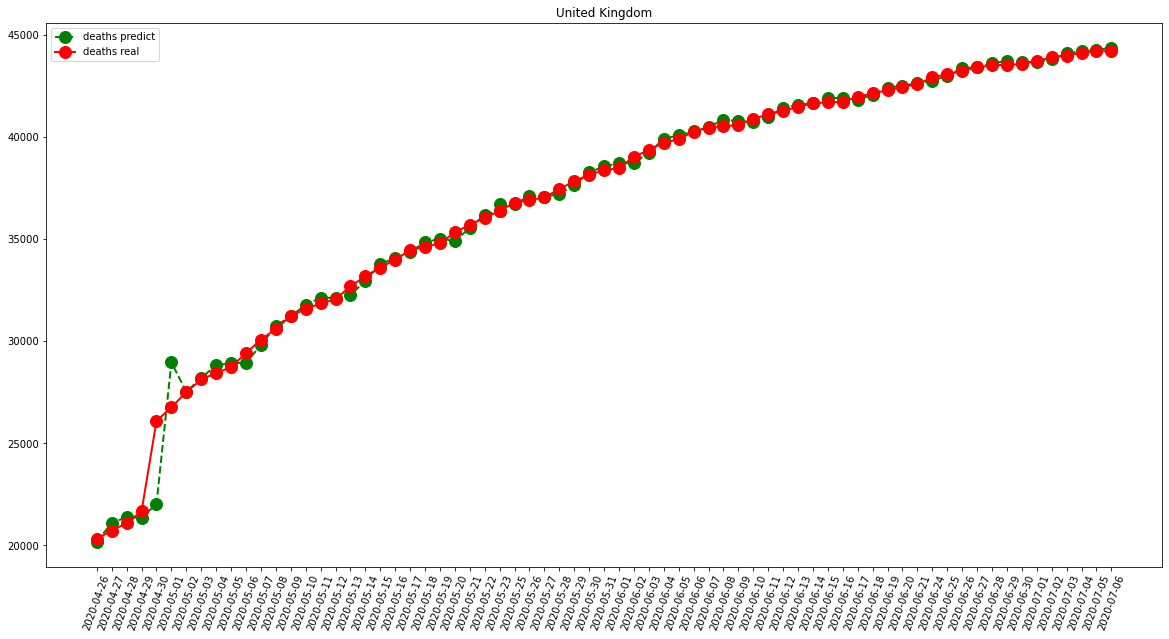

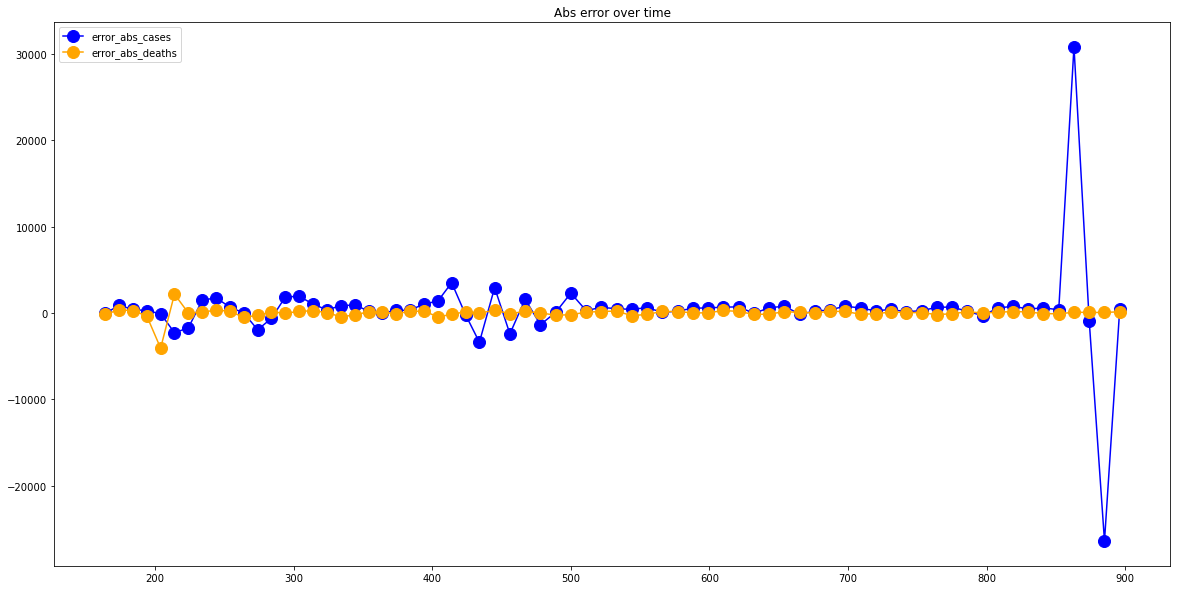

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  314.4
RMSE =  442.4068909305744
-- Germany performances for deaths --
MAE =  31.728571428571428
RMSE =  51.95753760799018


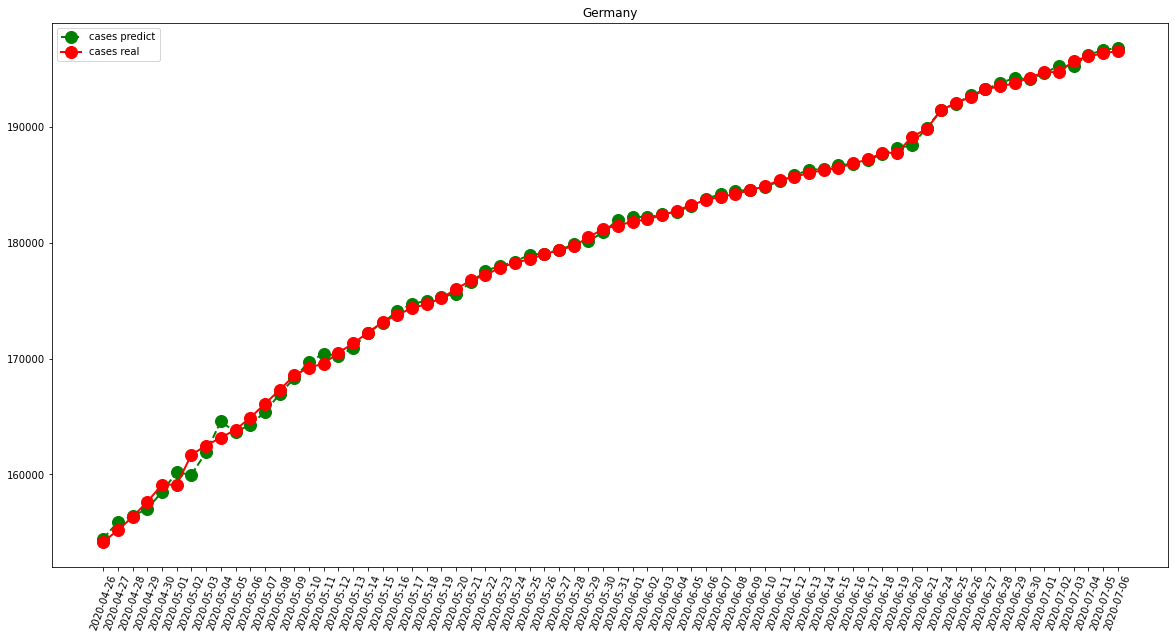

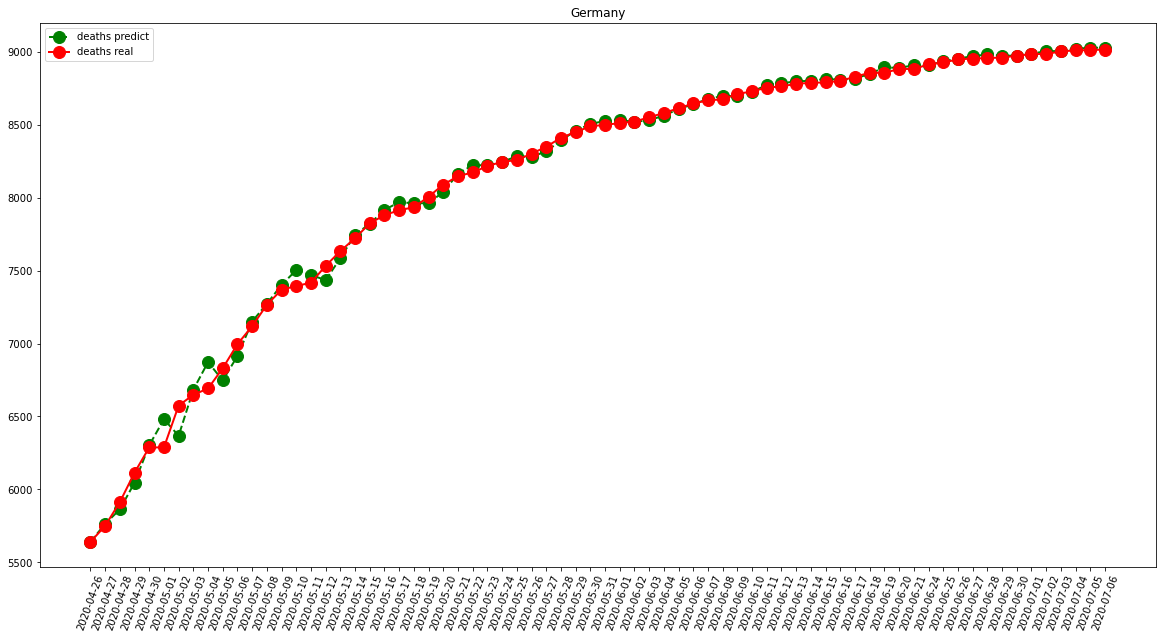

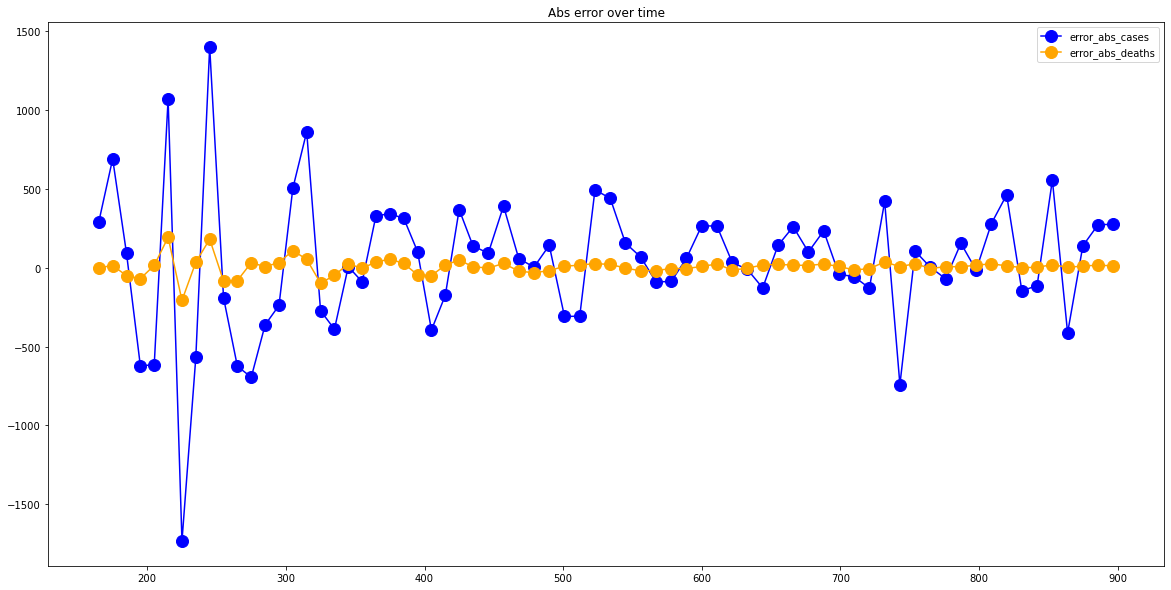

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  290.9714285714286
RMSE =  369.3622302602922
-- Iran performances for deaths --
MAE =  17.8
RMSE =  29.202250402519127


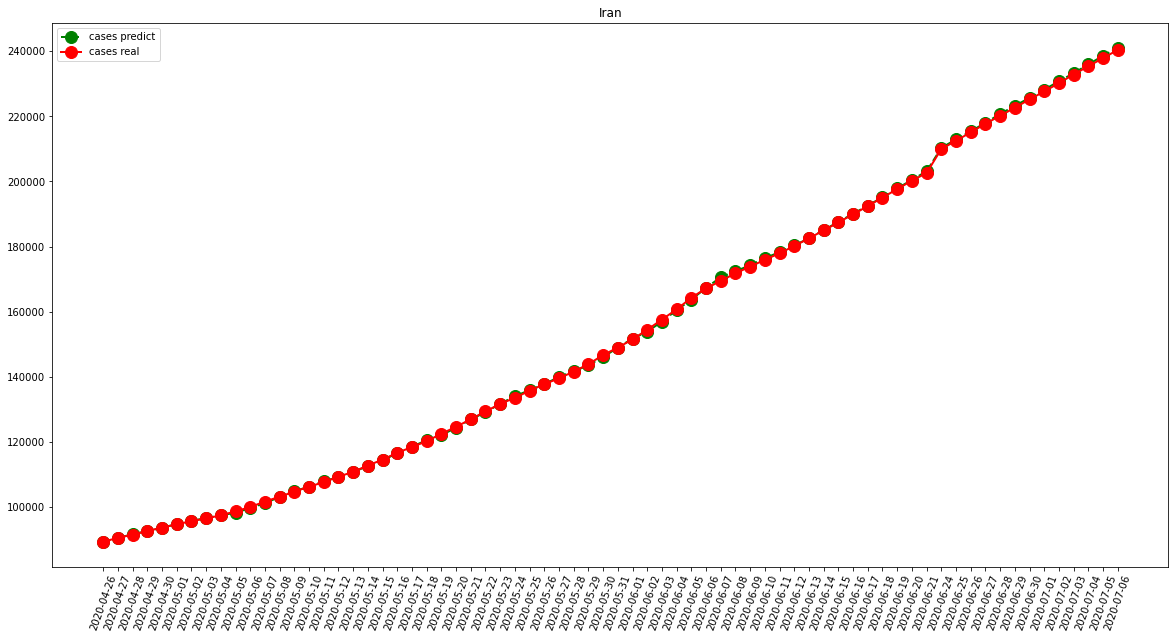

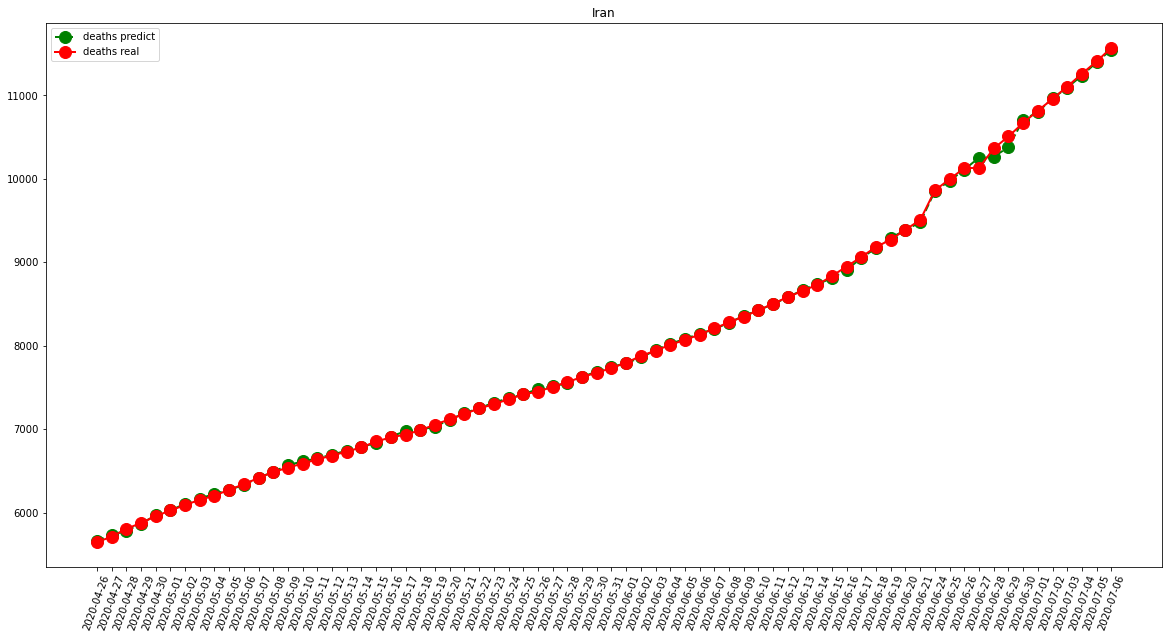

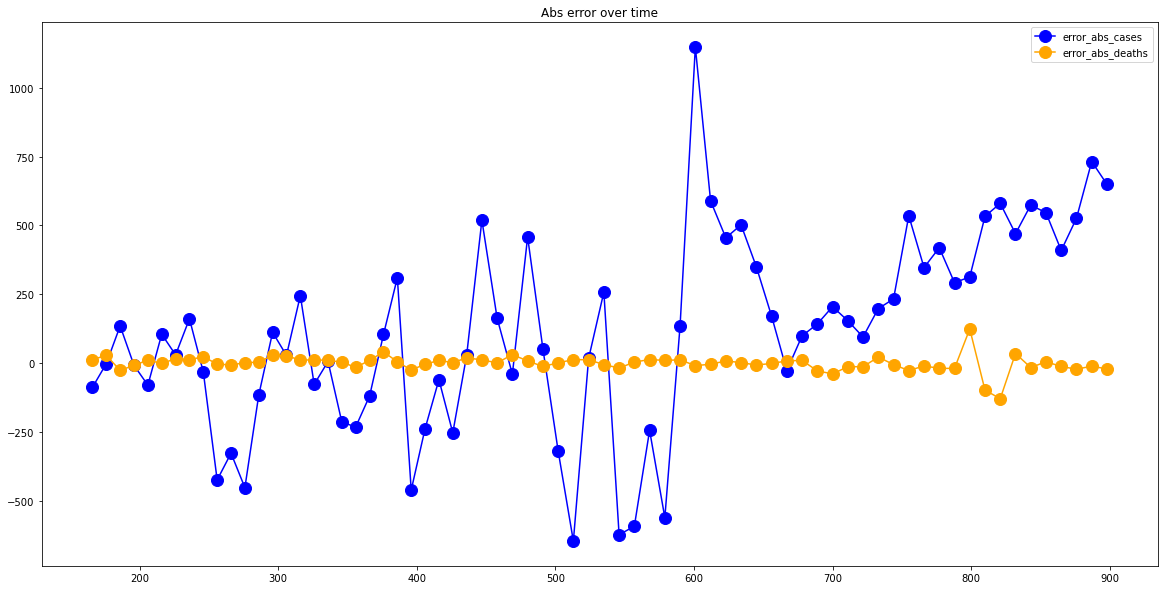

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  266.01428571428573
RMSE =  410.3847845968116
-- Turkey performances for deaths --
MAE =  26.214285714285715
RMSE =  121.31735242742482


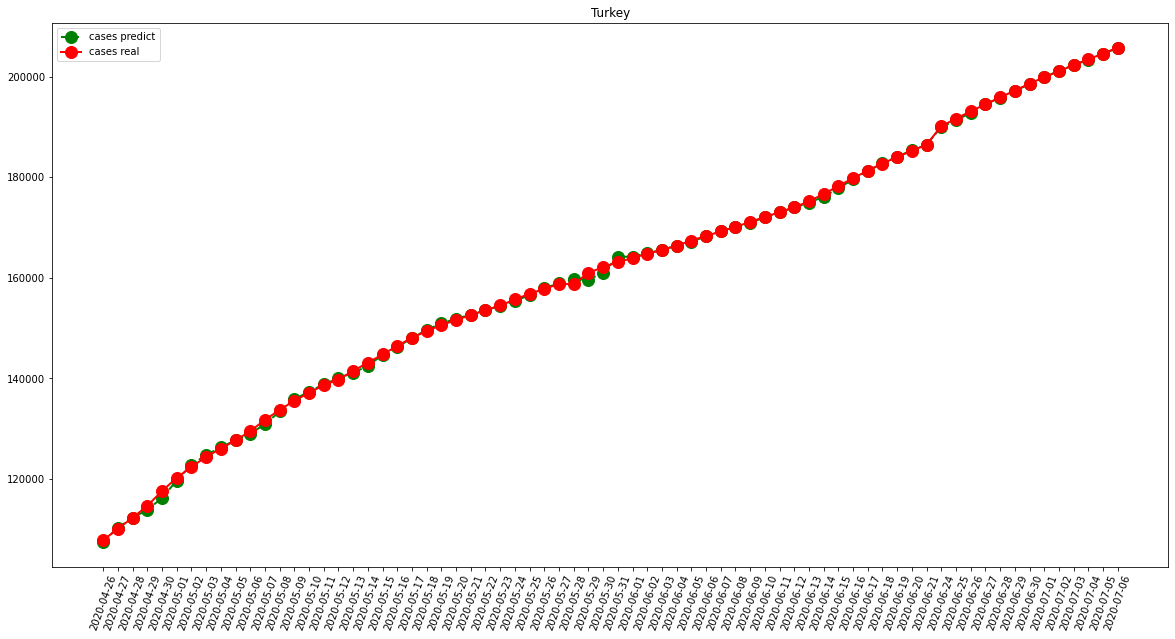

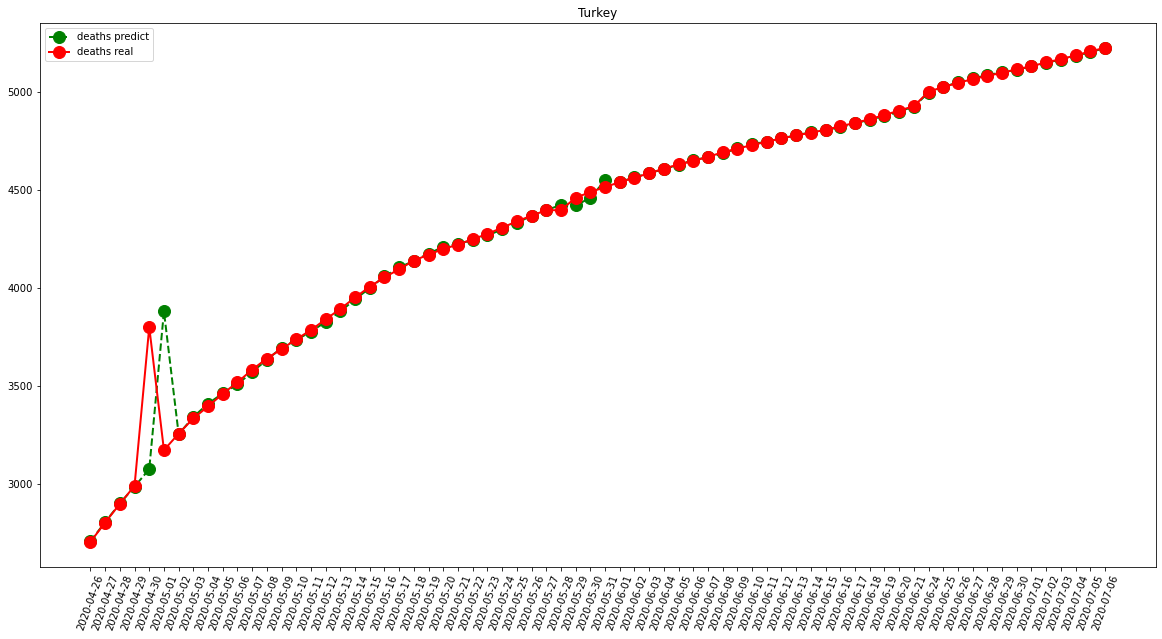

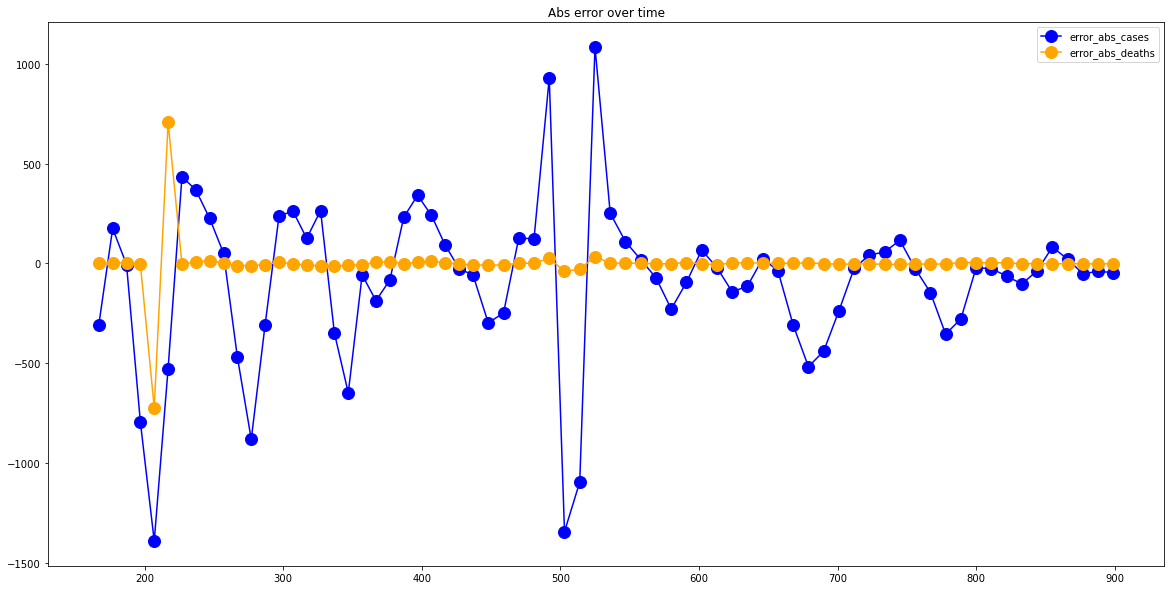

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9005.093023255815
RMSE =  11476.491432691926
-- Brazil performances for deaths --
MAE =  375.1860465116279
RMSE =  467.22752288316116


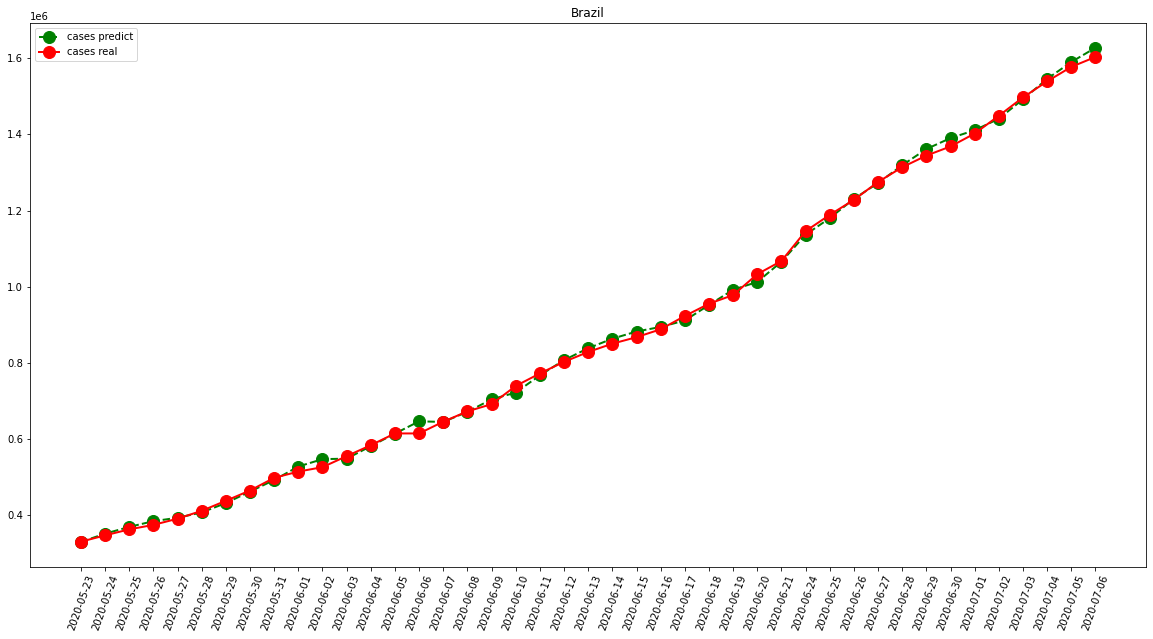

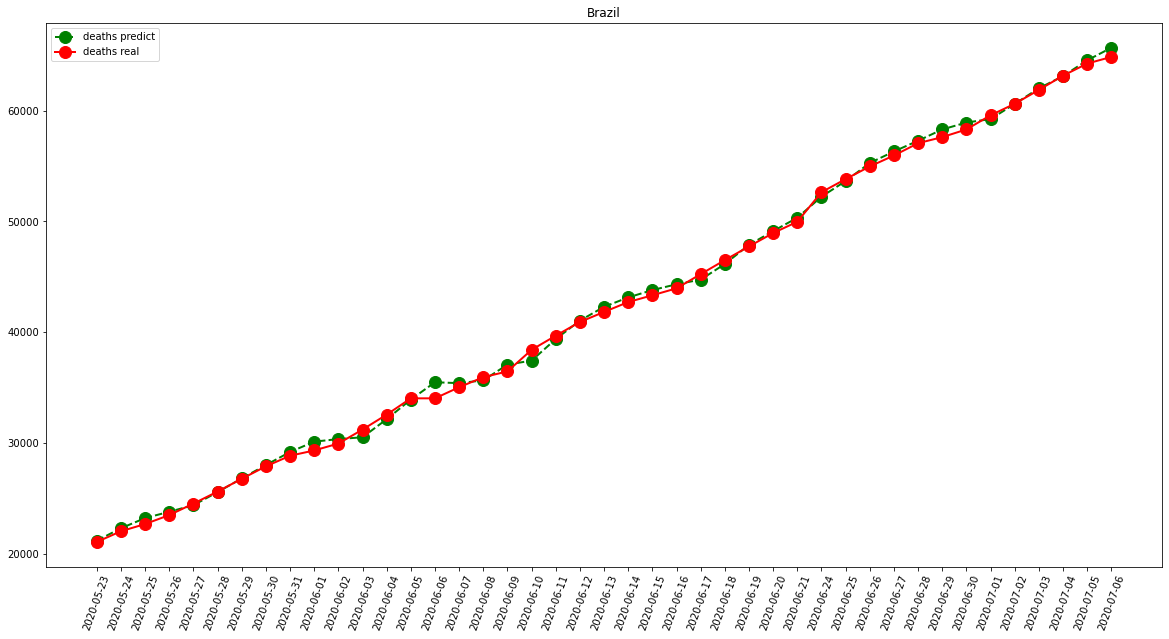

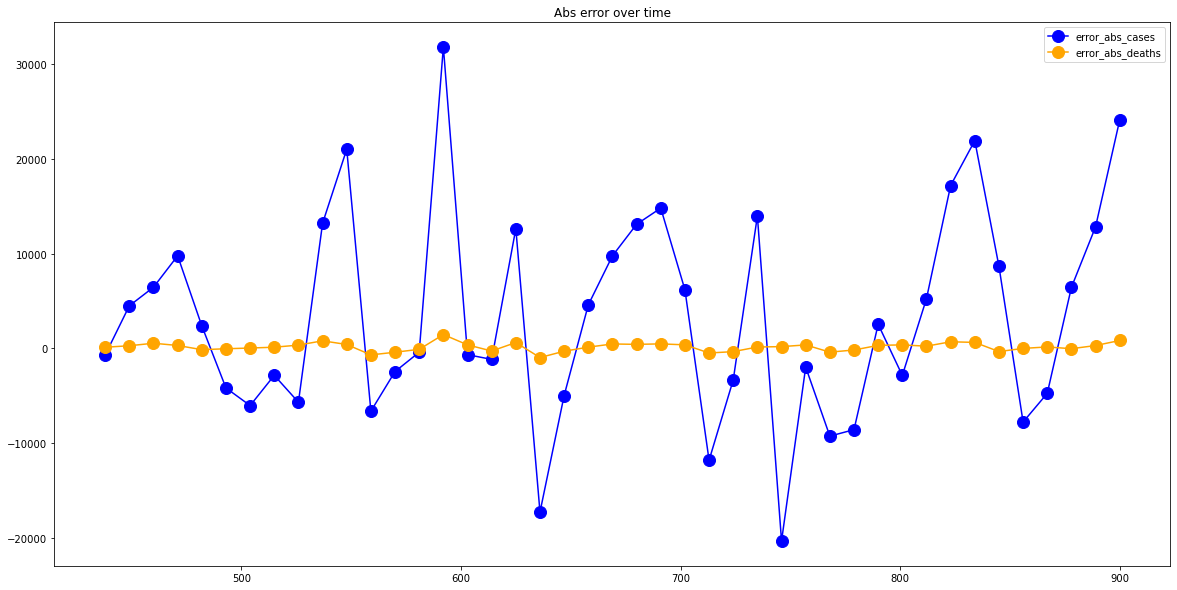

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)